In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
from PIL import Image
import os

# %matplotlib inline
# pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

(Text(0.5, 1.0, 'Hue Image'), ([], []), ([], []))

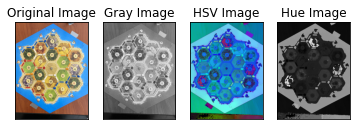

In [4]:
# img_orig = cv.imread('photos/IMG_7864.png')
img_orig = cv.imread('photos/test5_1.jpg')

img_orig = imutils.resize(img_orig, width=1000)

img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_h = img_hsv[:,:,0]


plt.subplot(141)
plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(img_hsv)
plt.title('HSV Image'), plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(img_h, cmap='gray')
plt.title('Hue Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

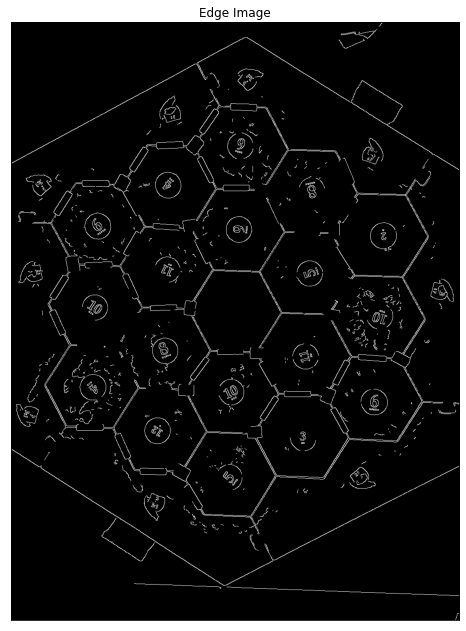

In [5]:
edges = cv.Canny(img, 400, 600)
plt.figure(figsize=(11,11))
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

shape circles: (1, 3)
len circles: 3
img_gray.shape: (1333, 1000), circles_img.shape: (1333, 1000, 3)


(Text(0.5, 1.0, 'circles image'), ([], []), ([], []))

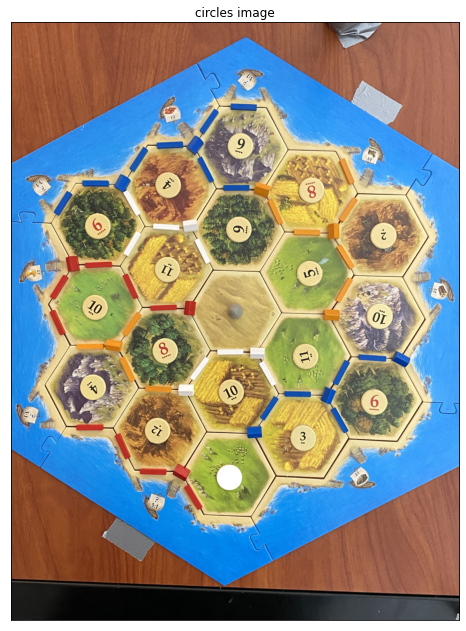

In [6]:
circles = cv.HoughCircles(img_gray,cv.HOUGH_GRADIENT_ALT,1,20,
                            param1=40,param2=.9,minRadius=10,maxRadius=50)
circles = np.uint16(np.around(circles))[0,:,0:3]
circles_img = img.copy()
for circ in circles:
    # circle_centers.append((circ[0],circ[1]))
    # draw the outer circle with fill
    cv.circle(circles_img,(circ[0],circ[1]),circ[2],(255,255,255),-1)
    # print(f"x, y, r: {circ[0]}, {circ[1]}, {circ[2]}")
    # draw the center of the circle
    # cv.circle(circles_img,(circ[0],circ[1]),2,(0,0,255),3)
print(f"shape circles: {circles.shape}")
print(f"len circles: {len(circles[0,:])}")
print(f"img_gray.shape: {img_gray.shape}, circles_img.shape: {circles_img.shape}")
plt.figure(figsize=(11,11))
plt.imshow(circles_img)
plt.title('circles image'), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'hsv image'), ([], []), ([], []))

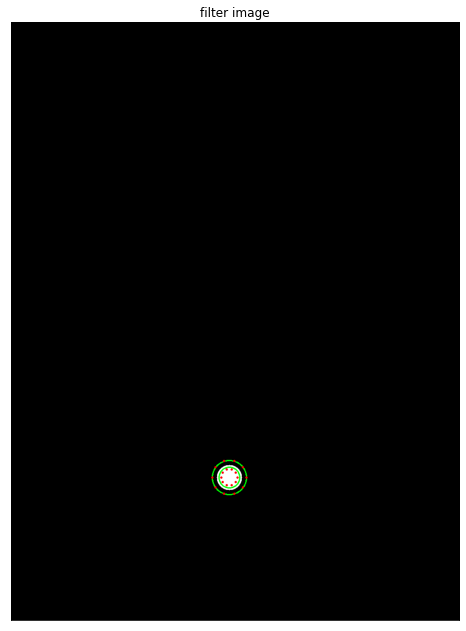

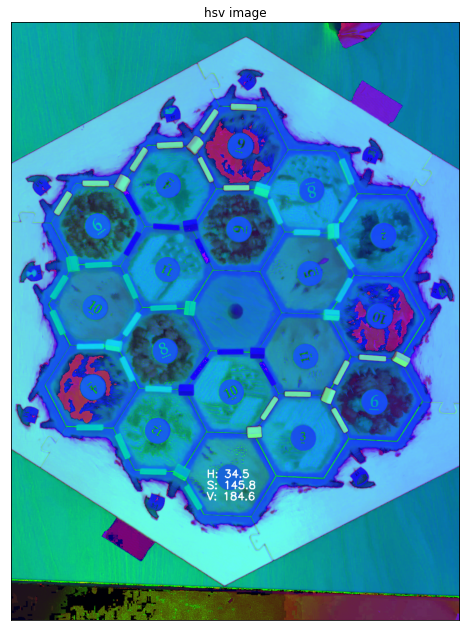

In [7]:
# Filter circles
filter_img = np.zeros(img.shape)
e = 10
num_pts = 10
avgs = []
avgs_inside = []
new_img_hsv = img_hsv.copy()
for circ in circles:
    cv.circle(filter_img, (circ[0], circ[1]), circ[2], (255, 255, 255), -1)
    cv.circle(filter_img, (circ[0], circ[1]), circ[2]+e, (0, 255, 0), 2)
    if circ[2] > 5:
        cv.circle(filter_img, (circ[0], circ[1]), circ[2]-5, (0, 255, 0), 2)
    avg = [0, 0, 0]
    avg_inside = [0, 0, 0]
    for j in range(1,num_pts+1):
        x = int(circ[0] + (e+circ[2])*np.cos(j*2*np.pi/10))
        y = int(circ[1] + (e+circ[2])*np.sin(j*2*np.pi/10))
        avg += img_hsv[y, x, :]
        cv.circle(filter_img, (x,y), 1, (255, 0, 0), 2)
        x1 = int(circ[0] + (-10+circ[2])*np.cos(j*2*np.pi/10))
        y1 = int(circ[1] + (-10+circ[2])*np.sin(j*2*np.pi/10))
        avg_inside += img_hsv[y1, x1, :]
        cv.circle(filter_img, (x1,y1), 1, (255, 0, 0), 2)
    avg = avg/num_pts
    avg_inside = avg_inside/num_pts
    avgs.append(avg)
    avgs_inside.append(avg_inside)
    # print(f"avg: {avg}")
    # cv.circle(new_img_hsv, (circ[0], circ[1]), circ[2], (int(avg[0]), int(avg[1]), int(avg[2])), -1)
    cv.circle(new_img_hsv, (circ[0], circ[1]), circ[2], (int(avg_inside[0]), int(avg_inside[1]), int(avg_inside[2])), -1)
    # cv.putText(new_img_hsv, "H: " + str(avg_inside[0]), (circ[0]-50, circ[1]), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
    # cv.putText(new_img_hsv, "S: " + str(avg_inside[1]), (circ[0]-50, circ[1]+25), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
    # cv.putText(new_img_hsv, "V: " + str(avg_inside[2]), (circ[0]-50, circ[1]+50), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
    cv.putText(new_img_hsv, "H: " + str(avg[0]), (circ[0]-50, circ[1]), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
    cv.putText(new_img_hsv, "S: " + str(avg[1]), (circ[0]-50, circ[1]+25), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
    cv.putText(new_img_hsv, "V: " + str(avg[2]), (circ[0]-50, circ[1]+50), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)
# print(f"averages: {avgs}")
plt.figure(figsize=(11,11))
plt.imshow(filter_img, cmap='gray')
plt.title('filter image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(11,11))
plt.imshow(new_img_hsv)
plt.title('hsv image'), plt.xticks([]), plt.yticks([])

hues
wheat: 19.6, 18.6, 19.1, 17.5, 18.9 [15-25]
brick: 25.7, 23.5, 11.3 [9-27]
stone: 79.2, 80.2, 128.3 [60-145]
wood: 34.8, 48.4, 71.0, 35.1 [30-75]
sheep: 41.4, 34.5, 37.2 [32-45]

saturations
wheat: 146.3, 137.0, 113.9, 143.8, 137.2 [100-155]
brick: 131.4, 97.0, 119.3 [90-140]
stone: 39.8, 50.4, 33.0 [28-55]
wood: 68.3, 36.8, 31.1, 97.8 [25-110]
sheep: 120.4, 140.6, 92.1 [80-150]

values
wheat: 189.9, 199.2, 208.5, 166.5, 191.0 [160-210]
brick: 141.0, 155.7, 113.8 [100-160]
stone: 154.2, 125.7, 119.9 [100-160]
wood: 95.9, 110.5, 93.9, 85.8 [75-120]
sheep: 156.6, 137.1, 183.5 [120-195]

bandit hsv: ~19, 45, 122
number hsv: ~20, 80, 220
yellow dice hsv: ~24, 190, 240
red dice hsv: ~74, 198, 145

In [8]:
# Separate circles into numbers, dice, and bandit
bandit_loc = []
dice_locs = []
num_locs = []
for i, circ in enumerate(circles):
    hsv = avgs_inside[i]
    if hsv[0] >= 15 and hsv[0] <= 25 and \
        hsv[1] >= 40 and hsv[1] <= 50 and \
        hsv[2] >= 115 and hsv[2] <= 130:
        bandit_loc.append(circ[0:3])
    elif hsv[0] >= 12 and hsv[0] <= 30 and \
        hsv[1] >= 50 and hsv[1] <= 130 and \
        hsv[2] >= 160 and hsv[2] <= 250:
        num_locs.append(circ[0:3])
    elif hsv[0] >= 15 and hsv[0] <= 80 and \
        hsv[1] >= 180 and hsv[1] <= 210 and \
        hsv[2] >= 130 and hsv[2] <= 260:
        dice_locs.append(circ[0:3])

print(f"len bandit_loc: {len(bandit_loc)}")
print(f"len dice_locs: {len(dice_locs)}")
print(f"len num_locs: {len(num_locs)}")

len bandit_loc: 0
len dice_locs: 0
len num_locs: 1


(Text(0.5, 1.0, 'hsv image'), ([], []), ([], []))

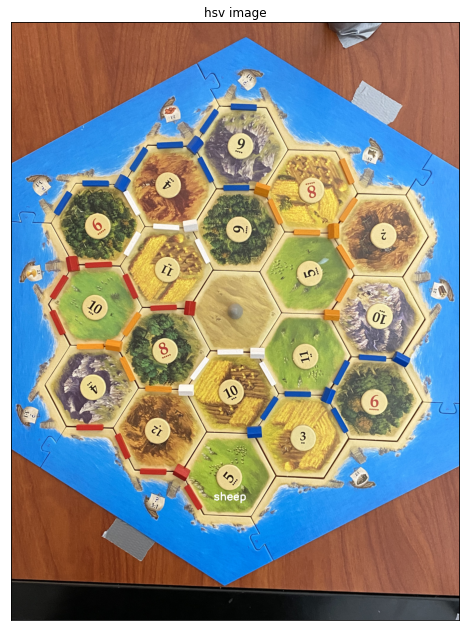

In [9]:
# hues
# wheat: 19.6, 18.6, 19.1, 17.5, 18.9 [15-25]
# brick: 25.7, 23.5, 11.3 [9-27]
# stone: 79.2, 80.2, 128.3 [60-145]
# wood: 34.8, 48.4, 71.0, 35.1 [30-75]
# sheep: 41.4, 34.5, 37.2 [32-45]

# saturations
# wheat: 146.3, 137.0, 113.9, 143.8, 137.2 [100-155]
# brick: 131.4, 97.0, 119.3 [90-140]
# stone: 39.8, 50.4, 33.0 [28-55]
# wood: 68.3, 36.8, 31.1, 97.8 [25-110]
# sheep: 120.4, 140.6, 92.1 [80-150]

# wheat: 189.9, 199.2, 208.5, 166.5, 191.0 [160-210]
# brick: 141.0, 155.7, 113.8 [100-160]
# stone: 154.2, 125.7, 119.9 [100-160]
# wood: 95.9, 110.5, 93.9, 85.8 [75-120]
# sheep: 156.6, 137.1, 183.5 [120-195]

new_img = img.copy()

# Select tiles
for i, circ in enumerate(num_locs):
    hsv = avgs[i]
    type = 'none'
    if hsv[0] >= 15 and hsv[0] <= 25 and \
        hsv[1] >= 100 and hsv[1] <= 155 and \
        hsv[2] >= 160 and hsv[2] <= 210:
        type = 'wheat'
    elif hsv[0] >= 9 and hsv[0] <= 27 and \
        hsv[1] >= 80 and hsv[1] <= 140 and \
        hsv[2] >= 100 and hsv[2] <= 160:
        type = 'brick'
    elif hsv[0] >= 60 and hsv[0] <= 145 and \
        hsv[1] >= 28 and hsv[1] <= 55 and \
        hsv[2] >= 100 and hsv[2] <= 160:
        type = 'stone'
    elif hsv[0] >= 26 and hsv[0] <= 75 and \
        hsv[1] >= 25 and hsv[1] <= 110 and \
        hsv[2] >= 75 and hsv[2] <= 130:
        type = 'wood'
    elif hsv[0] >= 32 and hsv[0] <= 45 and \
        hsv[1] >= 80 and hsv[1] <= 150 and \
        hsv[2] >= 120 and hsv[2] <= 200:
        type = 'sheep'
    cv.putText(new_img, type, (circ[0]-35, circ[1]+50), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)

if len(bandit_loc) == 1:
    cv.putText(new_img, 'bandit', (bandit_loc[0][0]-35, bandit_loc[0][1]+50), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)

for die_loc in dice_locs:
    cv.putText(new_img, 'die', (die_loc[0]-20, die_loc[1]+50), cv.FONT_HERSHEY_SIMPLEX, .8, (255, 255, 255), 2)

plt.figure(figsize=(11,11))
plt.imshow(new_img)
plt.title('hsv image'), plt.xticks([]), plt.yticks([])

In [10]:
# Make image mask for each number
num_imgs = []
num_masks = []
for circ, circ in enumerate(num_locs):
    num_mask = np.zeros(img_gray.shape)
    cv.circle(num_mask, (circ[0], circ[1]), circ[2]-2, 1, -1)
    # AND each mask with grayscale image to produce images
    # with only one visible number
    num_masks.append(num_mask)
    num_imgs.append(np.array(img_gray * num_mask).astype(np.uint8))
    # plt.figure(figsize=(11,11))
    # plt.imshow(num_imgs[circ], cmap='gray')
    # plt.title('num mask circ'), plt.xticks([]), plt.yticks([])



In [11]:
num_index = 4

# for num_index in range(len(num_masks)):
# Threshold each number image to make background all white
num_mask0_inv = np.where(num_masks[num_index]>0, 0, 1)
num_0_inv = np.where(num_mask0_inv>0, 255, num_imgs[num_index])
# num_0_white = np.where(num_0_inv>50, 255, num_0_inv)
num_0_white = np.where(num_0_inv>100, 255, 0).astype(np.float32)

# print(f"num_locs[0]: {num_locs[0]}")
cx = num_locs[num_index][0]
cy = num_locs[num_index][1]
cropped_num_img = cv.resize(num_0_white[cy-50:cy+50,cx-50:cx+50], (420,420)).astype(np.uint8)
img_h = cropped_num_img.shape[0]
img_w = cropped_num_img.shape[1]
# Create color version of image so debugging is easier
cropped_num_img_c = cv.cvtColor(cropped_num_img, cv.COLOR_GRAY2BGR)
# cv.circle(cropped_num_img_c, (int(img_w/2), int(img_h/2)), 5, (0,255,0), -1)

# plt.figure(figsize=(9,9))
# plt.imshow(cropped_num_img_c, cmap='gray')
# plt.title('thresholded number image'), plt.xticks([]), plt.yticks([])

kernel = np.ones((3,3), np.uint8)
img_erosion = cv.erode(cropped_num_img, kernel, iterations=2)
img_processed = cv.dilate(img_erosion, kernel, iterations=2)

cropped_num_img_c = cv.cvtColor(cropped_num_img, cv.COLOR_GRAY2BGR)
# cv.circle(cropped_num_img_c, (int(img_w/2), int(img_h/2)), 5, (0,255,0), -1)

ret, thresh = cv.threshold(img_processed, 127, 255, 0)
# Invert img
thresh = np.where(thresh>0,0,255).astype(np.uint8)
# Compute contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Make new img
img_contours = cv.cvtColor(thresh.copy(), cv.COLOR_GRAY2BGR)
cv.drawContours(img_contours, contours, -1, (0,255,0), 3)
# print(f"contours shape: {len(contours)}")

# Remove contour if too small
for i, cnt in enumerate(contours):
    area = cv.contourArea(cnt)
    print(f"area for cnt {i}: {area}")
    M = cv.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    if area < 100:
        cv.circle(cropped_num_img_c, (cx, cy), int(area/5), (255,255,255), -1)

hsv = avgs_inside[num_index]
cv.putText(img_contours, "num contours: " + str(len(contours)), (50, 50), cv.FONT_HERSHEY_SIMPLEX, .6, (255, 255, 255), 2)
cv.putText(img_contours, "avg num hue: " + str(hsv[0]), (50, 100), cv.FONT_HERSHEY_SIMPLEX, .6, (255, 255, 255), 2)
cv.putText(img_contours, "avg num value: " + str(hsv[1]), (50, 350), cv.FONT_HERSHEY_SIMPLEX, .6, (255, 255, 255), 2)
cv.putText(img_contours, "avg num saturation: " + str(hsv[2]), (50, 400), cv.FONT_HERSHEY_SIMPLEX, .6, (255, 255, 255), 2)

plt.figure(figsize=(6,6))
plt.imshow(cropped_num_img_c, cmap='gray')
plt.title('number image'), plt.xticks([]), plt.yticks([])

IndexError: list index out of range

In [ ]:
    # # print(f"num_locs[0]: {num_locs[0]}")
    # cx = num_locs[num_index][0]
    # cy = num_locs[num_index][1]
    # cropped_num_img = cv.resize(num_0_white[cy-50:cy+50,cx-50:cx+50], (420,420)).astype(np.uint8)
    # img_h = cropped_num_img.shape[0]
    # img_w = cropped_num_img.shape[1]
    # # Create color version of image so debugging is easier
    # cropped_num_img_c = cv.cvtColor(cropped_num_img, cv.COLOR_GRAY2BGR)
    # # cv.circle(cropped_num_img_c, (int(img_w/2), int(img_h/2)), 5, (0,255,0), -1)

    # plt.figure(figsize=(9,9))
    # plt.imshow(cropped_num_img_c, cmap='gray')
    # plt.title('thresholded number image'), plt.xticks([]), plt.yticks([])

In [ ]:
# kernel = np.ones((3,3), np.uint8)
# img_erosion = cv.erode(cropped_num_img, kernel, iterations=2)
# img_processed = cv.dilate(img_erosion, kernel, iterations=2)

# cropped_num_img_c = cv.cvtColor(cropped_num_img, cv.COLOR_GRAY2BGR)
# cv.circle(cropped_num_img_c, (int(img_w/2), int(img_h/2)), 5, (0,255,0), -1)

# ret, thresh = cv.threshold(img_processed, 127, 255, 0)
# # Invert img
# thresh = np.where(thresh>0,0,255).astype(np.uint8)
# # Compute contours
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# # Make new img
# img_contours = cv.cvtColor(thresh.copy(), cv.COLOR_GRAY2BGR)
# cv.drawContours(img_contours, contours, -1, (0,255,0), 3)
# print(f"contours shape: {len(contours)}")

# plt.figure(figsize=(9,9))
# plt.imshow(img_contours, cmap='gray')
# plt.title('number image'), plt.xticks([]), plt.yticks([])

In [ ]:
# Apply OCR to each image
# print(f"img0shape: {num_imgs[0].shape}")
cropped_num_img_c = cv.resize(cv.GaussianBlur(cropped_num_img_c, (5,5), 2, cv.BORDER_REPLICATE), (1000,1000))
ret, cropped_num_img_thresh = cv.threshold(cropped_num_img_c, 127, 255, 0)
print(f"cropped num img shape: {cropped_num_img_c.shape}")
cv.imwrite("tmp.png", cropped_num_img_thresh)
text = pytesseract.image_to_string(Image.open("tmp.png"))
# os.remove("tmp.png")
print(f"text from ocr: {text}")

cropped num img shape: (1000, 1000, 3)
text from ocr: i?

